In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
data = pd.read_csv('hacktrain.csv')

In [4]:
data.head(10)

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.99000,630.087,...,NaN,-1043.160,-1942.4900,267.138,NaN,NaN,211.328,-2203.0200,-1180.190,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.320,914.198,-692.38600,707.626,...,NaN,-933.934,-625.3850,120.059,364.8580,476.972,220.878,-2250.0000,-1360.560,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.630,NaN,-1564.63000,NaN,...,-1025.880,368.622,NaN,-1227.800,304.6210,NaN,369.214,-2202.1200,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.930,515.805,-1413.18000,-802.942,...,-1813.950,155.624,NaN,-924.073,432.1500,282.833,298.320,-2197.3600,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.830,1935.800,NaN,2158.980,...,1535.000,1959.430,-279.3170,-384.915,-113.4060,1020.720,1660.650,-116.8010,-568.050,-1357.140
5,8,9,water,1116.8600,NaN,-408.147,1685.700,1046.670,-7.58804,1435.990,...,1287.740,NaN,-561.3470,142.293,48.2714,NaN,1742.290,-60.3867,-1187.450,-1255.100
6,9,10,water,1485.7700,-223.142,727.773,180.491,1779.890,2613.97000,1869.390,...,3192.460,2152.400,-485.5630,NaN,178.7810,1763.990,1480.800,931.3970,-724.129,-1007.910
7,11,12,water,1207.3400,2833.130,-725.103,1720.860,1665.010,1037.84000,388.642,...,875.583,1836.610,78.7805,NaN,-463.4920,762.725,1948.980,41.1520,-1404.070,-1095.370
8,14,15,water,2250.3300,671.599,229.826,1831.990,1842.560,2186.74000,1910.270,...,1555.150,2133.410,1950.3300,1599.420,1430.9100,667.427,1426.470,2480.4900,1794.960,1378.450
9,15,16,water,4568.4600,5011.310,3088.330,2260.560,1864.960,1834.98000,2236.350,...,3973.620,2496.830,4758.1500,4177.900,4663.6600,2640.090,1943.720,4789.5300,4973.420,NaN


In [5]:
print(data.shape[0])

8000


In [6]:
ndvi_cols = list([col for col in data.columns if col.endswith("_N")])
print(len(ndvi_cols))

27


In [7]:
class_names=data["class"].unique()
print(class_names)

['water' 'forest' 'impervious' 'farm' 'grass' 'orchard']


In [8]:
means_20150720_N = {}
for cls in class_names:
    means_20150720_N[cls] = round(data[data["class"]==cls]["20150720_N"].mean(),2)
print(means_20150720_N)

{'water': 2455.55, 'forest': 6356.32, 'impervious': 2821.78, 'farm': 4838.36, 'grass': 6134.09, 'orchard': 6941.27}


In [9]:
means_20150602_N = {}
for cls in class_names:
    means_20150602_N[cls] = round(data[data["class"]==cls]["20150602_N"].mean(),2)
print(means_20150602_N)

{'water': 1628.97, 'forest': 5298.69, 'impervious': 2139.43, 'farm': 4088.16, 'grass': 5286.0, 'orchard': 5129.55}


In [10]:
indices = {'water':[], 'forest':[], 'impervious':[], 'farm':[], 'grass':[], 'orchard':[]}

for index, row in data.iterrows():
    if row['class'] in indices:
        indices[row['class']].append(index)

In [11]:
# Outlier removal using IQR

Q1 = data[ndvi_cols].quantile(0.25)
Q3 = data[ndvi_cols].quantile(0.75)
IQR = Q3 - Q1

data[ndvi_cols] = data[ndvi_cols].mask((data[ndvi_cols] < (Q1 - 1.5 * IQR)) |
                                       (data[ndvi_cols] > (Q3 + 1.5 * IQR)))

In [12]:
# Row wise interpolation for missing values in NDVI columns
data[ndvi_cols]=data[ndvi_cols].interpolate(axis=1,limit_direction='both')

# Fill remaining NaNs with column-wise median 
data[ndvi_cols] = data[ndvi_cols].fillna(data[ndvi_cols].median())

/var/folders/vv/zdfg0kqs73bdxb2hf29gbyfh0000gn/T/ipykernel_1520/4129914616.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data.loc[ls,col].dropna() for col in ndvi_cols], labels=ndvi_cols, showfliers=True)
/var/folders/vv/zdfg0kqs73bdxb2hf29gbyfh0000gn/T/ipykernel_1520/4129914616.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data.loc[ls,col].dropna() for col in ndvi_cols], labels=ndvi_cols, showfliers=True)
/var/folders/vv/zdfg0kqs73bdxb2hf29gbyfh0000gn/T/ipykernel_1520/4129914616.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data.loc[ls,col].dropna() for col in 

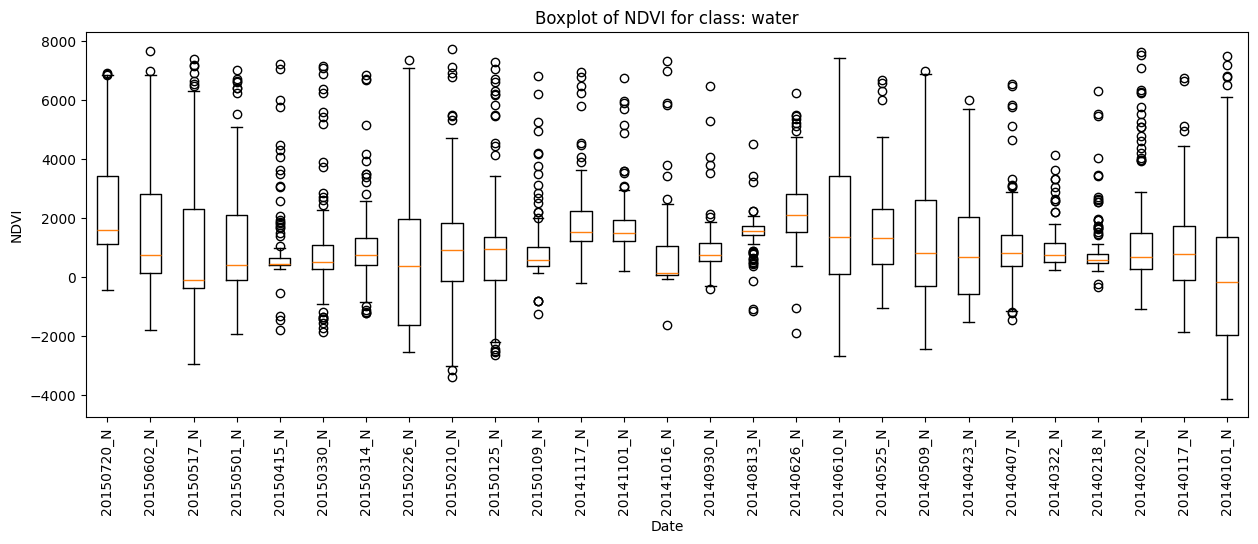

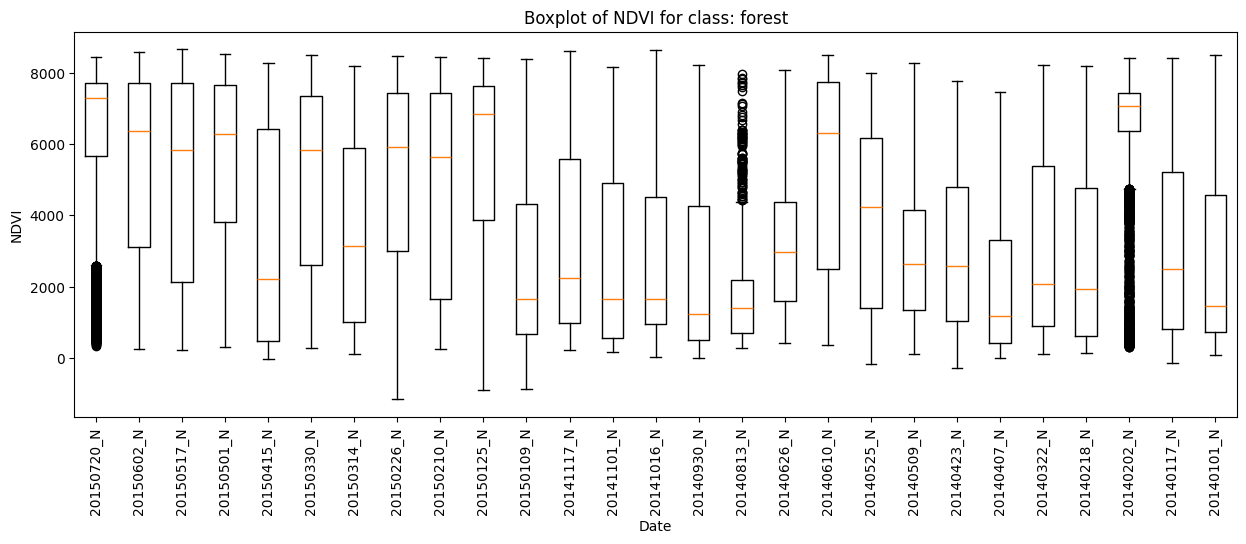

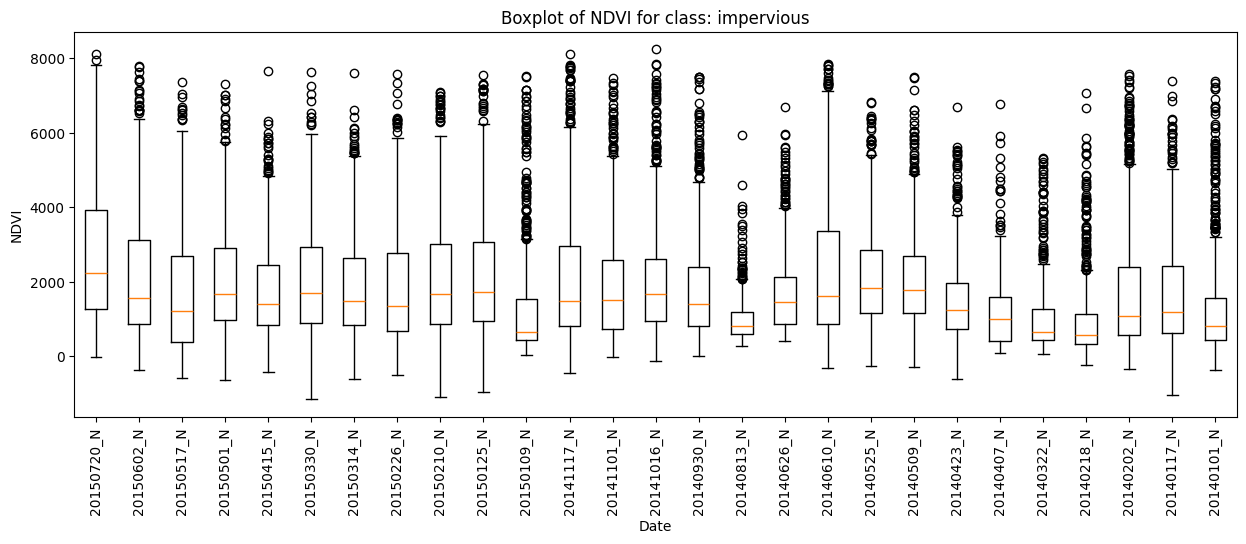

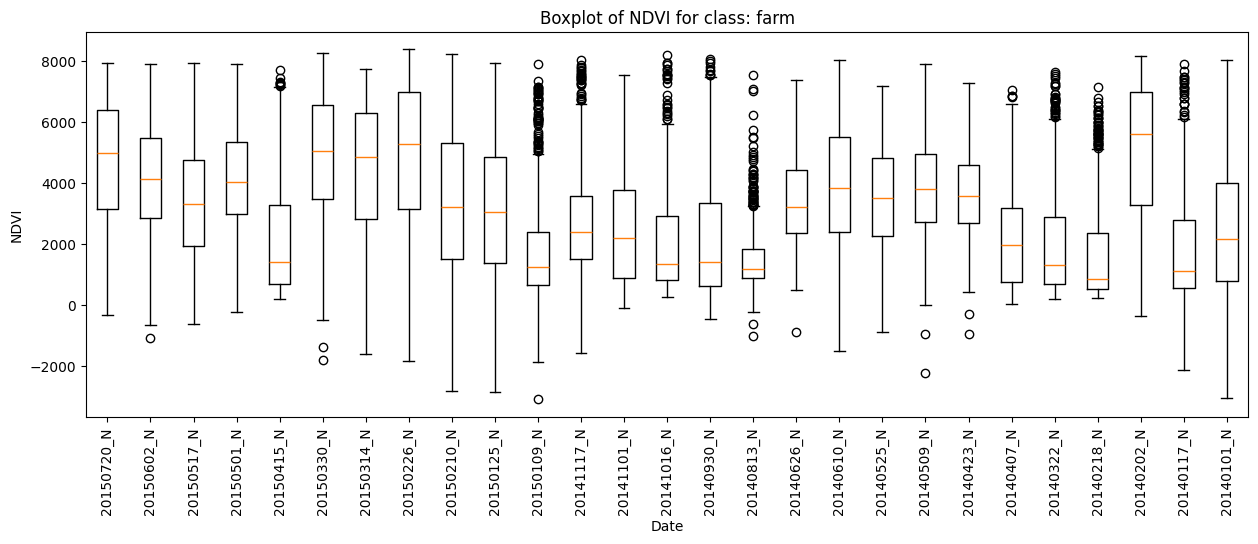

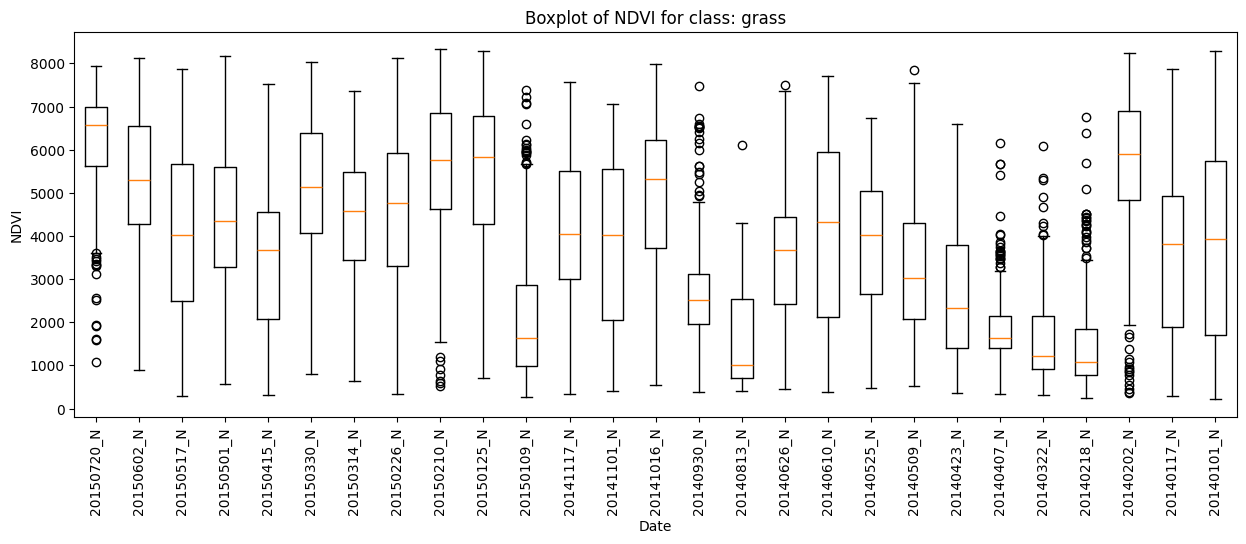

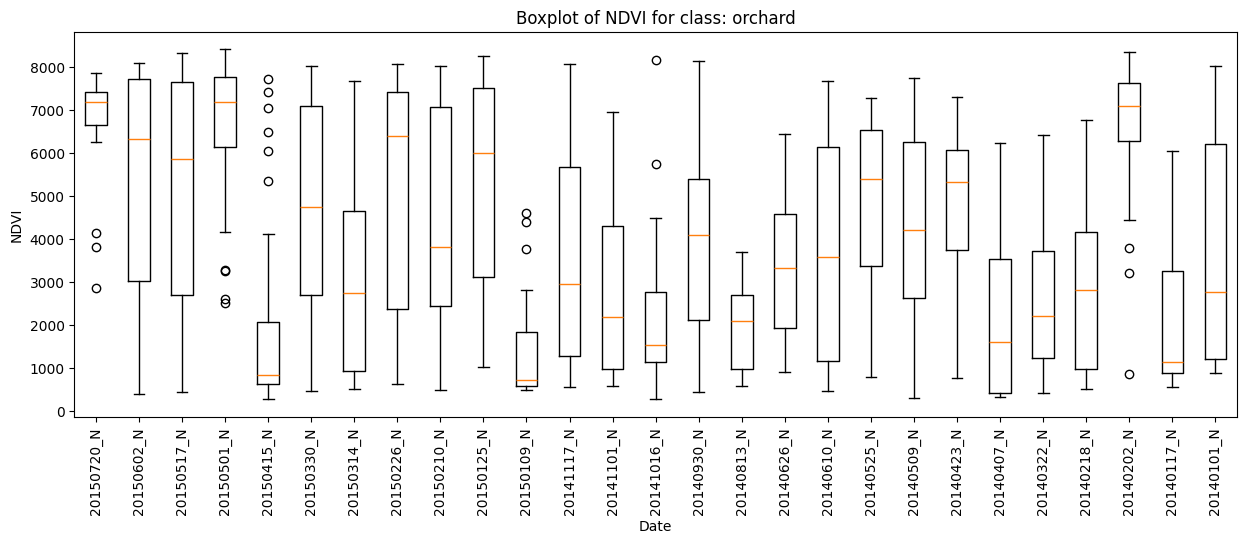

In [13]:
for c,ls in indices.items():
    plt.figure(figsize=(15, 5))
    plt.boxplot([data.loc[ls,col].dropna() for col in ndvi_cols], labels=ndvi_cols, showfliers=True)
    plt.title(f'Boxplot of NDVI for class: {c}')
    plt.xlabel('Date')
    plt.ylabel('NDVI')
    plt.xticks(rotation=90)
plt.show()

In [16]:
data.isna().sum().sum()
    

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode target labels
le = LabelEncoder()
data['class_encoded'] = le.fit_transform(data['class'])

X = data[ndvi_cols].dropna(axis=1)
y = data['class_encoded']

from sklearn.model_selection import train_test_split
# Train model on 80% data using Logistic Regression
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report, accuracy_score
# Predict on validation set (20%)
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))

print(classification_report(y_val, y_pred, target_names=le.classes_))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.853125
              precision    recall  f1-score   support

        farm       0.58      0.44      0.50       161
      forest       0.88      0.95      0.92      1231
       grass       0.71      0.12      0.20        43
  impervious       0.82      0.75      0.78       141
     orchard       0.00      0.00      0.00         6
       water       0.80      0.67      0.73        18

    accuracy                           0.85      1600
   macro avg       0.63      0.49      0.52      1600
weighted avg       0.84      0.85      0.84      1600



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
